In [1]:
import pandas as pd
import sklearn as skl
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from metpy.plots import USCOUNTIES

from awips.dataaccess import DataAccessLayer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import ShapelyFeature, NaturalEarthFeature
from shapely.geometry import Polygon
from shapely.ops import cascaded_union

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
nytimes_data = pd.read_csv('./us-counties.csv')

In [3]:
nytimes_data.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
grouped_ny_times = nytimes_data.groupby(['date', 'state']).sum()

In [5]:
grouped_ny_times.index

MultiIndex([('2020-01-21',     'Washington'),
            ('2020-01-22',     'Washington'),
            ('2020-01-23',     'Washington'),
            ('2020-01-24',       'Illinois'),
            ('2020-01-24',     'Washington'),
            ('2020-01-25',     'California'),
            ('2020-01-25',       'Illinois'),
            ('2020-01-25',     'Washington'),
            ('2020-01-26',        'Arizona'),
            ('2020-01-26',     'California'),
            ...
            ('2020-03-26',      'Tennessee'),
            ('2020-03-26',          'Texas'),
            ('2020-03-26',           'Utah'),
            ('2020-03-26',        'Vermont'),
            ('2020-03-26', 'Virgin Islands'),
            ('2020-03-26',       'Virginia'),
            ('2020-03-26',     'Washington'),
            ('2020-03-26',  'West Virginia'),
            ('2020-03-26',      'Wisconsin'),
            ('2020-03-26',        'Wyoming')],
           names=['date', 'state'], length=1335)

In [25]:
roads = cfeature.NaturalEarthFeature(
    category='cultural',
    name='roads',
    scale='10m',
    facecolor='none'))


In [65]:
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces',
    scale='50m',
    facecolor='none')

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    facecolor='none')

In [60]:
county_shapes = cartopy.io.shapereader.Reader('./cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
counties = cfeature.ShapelyFeature(county_shapes.geometries(),
                                   cartopy.crs.PlateCarree())

In [63]:
def RoadGeometriesByClass(path, road_class):
    reader = cartopy.io.shapereader.Reader(path)
    records = list(reader.records())
    
    for record in records:
        if record.attributes['RTTYP'] == road_class:
            yield record.geometry

interstate_geometries = (
    tuple(RoadGeometriesByClass('./tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp', 
                                'I')))

interstates = cfeature.ShapelyFeature(interstate_geometries, 
                                      cartopy.crs.PlateCarree())

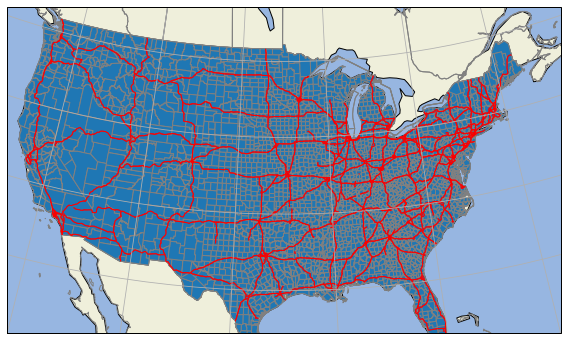

In [67]:
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(countries, edgecolor='gray')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(counties, edgecolor='gray')
ax.add_feature(interstates, edgecolor='red')
ax.gridlines()